___

### SMU DS7335 Machine Learning II <br>
### Homework #2 <br>
### Rick Fontenot
___

### adapt this code below to run your analysis
### 1. Write a function to take a list or dictionary of clfs and hypers(i.e. use logistic regression), each with 3 different sets of hyper parameters for each
### 2. Expand to include larger number of classifiers and hyperparameter settings
### 3. Find some simple data
### 4. generate matplotlib plots that will assist in identifying the optimal clf and parampters settings
### 5. Please set up your code to be run and save the results to the directory that its executed from
### 6. Investigate grid search function

In [164]:
# Preliminary Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None, "max_colwidth", 80)


### Load and Prepare dataset to test out tools
Toy data set: Wine classification from the sklearn library

In [3]:
from sklearn.datasets import load_wine

# Load the dataset
wine = load_wine()

# Show the dataset's keys
print(list(wine))


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']


In [4]:
# Names of the 13 groups of data
print(wine['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [7]:
wine['data'].shape

(178, 13)

In [8]:
wine['data'][0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

### Run the framework code provided by profressor

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score # other metrics too pls!
from sklearn.ensemble import RandomForestClassifier # more!
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [86]:
M = np.array([[1,2],[3,4],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5]])
L = np.ones(M.shape[0])
n_folds = 5

data = (M, L, n_folds)

def run(a_clf, data, clf_hyper={}):
  M, L, n_folds = data # unpack data container
  kf = KFold(n_splits=n_folds) # Establish the cross validation
  ret = {} # classic explication of results

  for ids, (train_index, test_index) in enumerate(kf.split(M, L)):
    clf = a_clf(**clf_hyper) # unpack parameters into clf is they exist
    clf.fit(M[train_index], L[train_index])
    pred = clf.predict(M[test_index])
    ret[ids]= {'clf': clf,
               'train_index': train_index,
               'test_index': test_index,
               'accuracy': accuracy_score(L[test_index], pred)}
  return ret

results = run(RandomForestClassifier, data, clf_hyper={})

results

{0: {'clf': RandomForestClassifier(),
  'train_index': array([2, 3, 4, 5, 6, 7]),
  'test_index': array([0, 1]),
  'accuracy': 1.0},
 1: {'clf': RandomForestClassifier(),
  'train_index': array([0, 1, 4, 5, 6, 7]),
  'test_index': array([2, 3]),
  'accuracy': 1.0},
 2: {'clf': RandomForestClassifier(),
  'train_index': array([0, 1, 2, 3, 6, 7]),
  'test_index': array([4, 5]),
  'accuracy': 1.0},
 3: {'clf': RandomForestClassifier(),
  'train_index': array([0, 1, 2, 3, 4, 5, 7]),
  'test_index': array([6]),
  'accuracy': 1.0},
 4: {'clf': RandomForestClassifier(),
  'train_index': array([0, 1, 2, 3, 4, 5, 6]),
  'test_index': array([7]),
  'accuracy': 1.0}}

### Run the base function on Wine dataset for comparision

In [87]:
M = wine['data']
L = wine['target']
n_folds = 5

data = (M, L, n_folds)

hyper_parms = {
          "n_estimators" : [100, 200, 500, 1000],
          'max_depth': [ 50, 100],
          "max_features" : ["auto", "sqrt", "log2"],
          "criterion": ['gini', 'entropy'],
          "oob_score": [True, False],
          }

def run(a_clf, data, clf_hyper={}):
  M, L, n_folds = data # unpack data container
  kf = KFold(n_splits=n_folds) # Establish the cross validation
  ret = {} # classic explication of results

  for ids, (train_index, test_index) in enumerate(kf.split(M, L)):
    clf = a_clf(**clf_hyper) # unpack parameters into clf is they exist
    clf.fit(M[train_index], L[train_index])
    pred = clf.predict(M[test_index])
    ret[ids]= {'clf': clf,
               'train_index': train_index,
               'test_index': test_index,
               'accuracy': accuracy_score(L[test_index], pred)}
  return ret

results = run(RandomForestClassifier, data)
#results = run(RandomForestClassifier, data, hyper_parms)

results

{0: {'clf': RandomForestClassifier(),
  'train_index': array([ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
          49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
          62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
          75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
          88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
         101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
         114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
         127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
         153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
         166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]),
  'test_index': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 

### Notes:
* In example data, target is all "1", there's no stratification or shuffling before the K-fold splits
* You have to enter the model type as parameter, could be helpful to accept list of model types to iterate through
* There's no example of format for clf_hyper dictionary and it looks like it just accpets one set of parameters, not a list of combinations to loop through
* On the wine dataset, the accuracy varies significantly between folds, may need to stratify splits and/or shuffle

### Strategy to build grid search:
* Define a function that creates a model given the model type, import model, adds parameters
* Define a function that given list of search space creates a grid of all parameter combinations
* Adapt professors code to run CV on all models in the grid(s)

### Function to create a model

In [96]:
import importlib
import sklearn

def create_model(
    model_name: str, import_module: str, model_params: dict
) -> sklearn.base.BaseEstimator:
    """Returns a scikit-learn model."""
    model_class = getattr(importlib.import_module(import_module), model_name)
    model = model_class(**model_params)  # Instantiates the model
    return model

Test the create_model function

In [97]:
model_params = {"n_estimators": 100, "max_depth": 50, "criterion": 'gini'}
model = create_model("RandomForestClassifier", "sklearn.ensemble", model_params)

print(model)

for parameter, value in model.get_params().items():
    print(parameter, " = ",value)

RandomForestClassifier(max_depth=50)
bootstrap  =  True
ccp_alpha  =  0.0
class_weight  =  None
criterion  =  gini
max_depth  =  50
max_features  =  auto
max_leaf_nodes  =  None
max_samples  =  None
min_impurity_decrease  =  0.0
min_samples_leaf  =  1
min_samples_split  =  2
min_weight_fraction_leaf  =  0.0
n_estimators  =  100
n_jobs  =  None
oob_score  =  False
random_state  =  None
verbose  =  0
warm_start  =  False


### Define function that creates grid of all parameter combinations

In [95]:
import itertools

def create_grid(search_space):  
    keys=search_space.keys()
    combinations=itertools.product(*search_space.values())
    return [dict(zip(keys,cc)) for cc in combinations]
    
sample_grid = {
          "n_estimators" : [100, 200, 500, 1000],
          'max_depth': [ 50, 100],
          "criterion": ['gini', 'entropy'],
          }

print(create_grid(sample_grid))

[{'n_estimators': 100, 'max_depth': 50, 'criterion': 'gini'}, {'n_estimators': 100, 'max_depth': 50, 'criterion': 'entropy'}, {'n_estimators': 100, 'max_depth': 100, 'criterion': 'gini'}, {'n_estimators': 100, 'max_depth': 100, 'criterion': 'entropy'}, {'n_estimators': 200, 'max_depth': 50, 'criterion': 'gini'}, {'n_estimators': 200, 'max_depth': 50, 'criterion': 'entropy'}, {'n_estimators': 200, 'max_depth': 100, 'criterion': 'gini'}, {'n_estimators': 200, 'max_depth': 100, 'criterion': 'entropy'}, {'n_estimators': 500, 'max_depth': 50, 'criterion': 'gini'}, {'n_estimators': 500, 'max_depth': 50, 'criterion': 'entropy'}, {'n_estimators': 500, 'max_depth': 100, 'criterion': 'gini'}, {'n_estimators': 500, 'max_depth': 100, 'criterion': 'entropy'}, {'n_estimators': 1000, 'max_depth': 50, 'criterion': 'gini'}, {'n_estimators': 1000, 'max_depth': 50, 'criterion': 'entropy'}, {'n_estimators': 1000, 'max_depth': 100, 'criterion': 'gini'}, {'n_estimators': 1000, 'max_depth': 100, 'criterion':

### Create sample dictionary to define grid search space and test the create_grid and create_model functions together

In [111]:
search_space = {
  ('RandomForestClassifier','sklearn.ensemble'):{
          "n_estimators" : [100, 200, 500, 1000],
          'max_depth': [ 50, 100],
          "criterion": ['gini', 'entropy'],
          },
  ('LogisticRegression','sklearn.linear_model'):{
        'C': [100,250,500],
        'class_weight': ['balanced','none']
  }        
}

for model_type, parameters in search_space.items():
  print("Model Name: ",model_type[0])
  print("Import Library: ",model_type[1])
  print("Parameters", parameters)

print("__________________")

for model_typedel, parameters in search_space.items():
  grid = create_grid(parameters)
  print(model_type[0])
  print(grid)

print("__________________")

for model_type, parameters in search_space.items():
  grid = create_grid(parameters)
  for model_params in grid:
    model=create_model(model_type[0], model_type[1], model_params)
    print(model)

Model Name:  RandomForestClassifier
Import Library:  sklearn.ensemble
Parameters {'n_estimators': [100, 200, 500, 1000], 'max_depth': [50, 100], 'criterion': ['gini', 'entropy']}
Model Name:  LogisticRegression
Import Library:  sklearn.linear_model
Parameters {'C': [100, 250, 500], 'class_weight': ['balanced', 'none']}
__________________
LogisticRegression
[{'n_estimators': 100, 'max_depth': 50, 'criterion': 'gini'}, {'n_estimators': 100, 'max_depth': 50, 'criterion': 'entropy'}, {'n_estimators': 100, 'max_depth': 100, 'criterion': 'gini'}, {'n_estimators': 100, 'max_depth': 100, 'criterion': 'entropy'}, {'n_estimators': 200, 'max_depth': 50, 'criterion': 'gini'}, {'n_estimators': 200, 'max_depth': 50, 'criterion': 'entropy'}, {'n_estimators': 200, 'max_depth': 100, 'criterion': 'gini'}, {'n_estimators': 200, 'max_depth': 100, 'criterion': 'entropy'}, {'n_estimators': 500, 'max_depth': 50, 'criterion': 'gini'}, {'n_estimators': 500, 'max_depth': 50, 'criterion': 'entropy'}, {'n_estimat

### Now that search dictionary format is set and looping through works for creating grid and models, incorporate this into the CV function provided by professor

In [342]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

features = wine['data']
target = wine['target']
n_folds = 5

data = (features, target, n_folds)

def run(data, search_space={}):
  features, target, n_folds = data # unpack data container
  skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42) # Establish the cross validation
  summary = pd.DataFrame(columns = ["Model","Parameters", "Fold", "Accuracy","Precision","Recall"])


  for model_type, parameters in search_space.items():
    grid = create_grid(parameters)
    for model_params in grid:
        model=create_model(model_type[0], model_type[1], model_params)
        for ids, (train_index, test_index) in enumerate(skf.split(features, target)):
            #print(model)
            model.fit(features[train_index], target[train_index])
            pred = model.predict(features[test_index])
            accuracy = accuracy_score(target[test_index], pred)
            precision = precision_score(target[test_index], pred, average='macro')
            recall = recall_score(target[test_index], pred, average='macro')

            summary.loc[len(summary.index)] = [model_type[0], str(model_params), ids, accuracy, precision, recall]

  return summary

In [343]:
features = wine['data']
target = wine['target']
n_folds = 5

data = (features, target, n_folds)

search_space = {
  ('XGBClassifier','xgboost'):{
      'n_estimators':[100,200],
      'max_depth':[5,15,20],
      'max_leaves': [30,50,70],
      'min_child_weight': [5, 10, 15],
      'gamma': [1, 1.5, 2, 2.5],
      'subsample': [0.6, 0.8, 1.0],
      #'scale_pos_weight': [1,10,20,30],
      #'early_stopping_rounds': [5],
      #'eval_metric': ['logloss'],
      'learning_rate': [0.1, 0.05],
      'use_label_encoder':[False],
      'n_jobs':[6],
      'verbosity':[0]
      },
  ('RandomForestClassifier','sklearn.ensemble'):{
      "n_estimators" : [100, 200, 500, 1000],
      'max_depth': [5, 15, 25, 50, 100],
      "criterion": ['gini', 'entropy'],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [5, 10, 15],
      'class_weight': [None, 'balanced'],
      'n_jobs':[6]
        },
  ('LogisticRegression','sklearn.linear_model'):{
      'C': [1, 10, 20, 50, 100, 250, 500],
      'solver': ['liblinear'],
      'class_weight': [None, 'balanced'],
        },
  ('KNeighborsClassifier','sklearn.neighbors'):{
        'weights': ['uniform','distance'],
        'leaf_size': [5,10],
        'metric': ['manhattan','euclidean'],
        'n_neighbors':[2,3,5,10],
        'n_jobs':[6]
        }
}

function_search_time_start = time.time()
summary = run(data, search_space)
print("Function search time (all models):", time.time() - function_search_time_start)


Function search time (all models): 1292.512183189392


In [344]:
print(summary.shape)
summary.head(10)


(10310, 6)


,Model,Parameters,Fold,Accuracy,Precision,Recall
0,XGBClassifier,"{'n_estimators': 100, 'max_depth': 5, 'max_leaves': 30, 'min_child_weight': ...",0,0.972222,0.969697,0.976190
1,XGBClassifier,"{'n_estimators': 100, 'max_depth': 5, 'max_leaves': 30, 'min_child_weight': ...",1,1.000000,1.000000,1.000000
2,XGBClassifier,"{'n_estimators': 100, 'max_depth': 5, 'max_leaves': 30, 'min_child_weight': ...",2,0.972222,0.974359,0.976190
3,XGBClassifier,"{'n_estimators': 100, 'max_depth': 5, 'max_leaves': 30, 'min_child_weight': ...",3,0.885714,0.883450,0.896825
4,XGBClassifier,"{'n_estimators': 100, 'max_depth': 5, 'max_leaves': 30, 'min_child_weight': ...",4,1.000000,1.000000,1.000000
5,XGBClassifier,"{'n_estimators': 100, 'max_depth': 5, 'max_leaves': 30, 'min_child_weight': ...",0,0.972222,0.969697,0.976190
6,XGBClassifier,"{'n_estimators': 100, 'max_depth': 5, 'max_leaves': 30, 'min_child_weight': ...",1,1.000000,1.000000,1.000000
7,XGBClassifier,"{'n_estimators': 100, 'max_depth': 5, 'max_leaves': 30, 'min_child_weight': ...",2,0.944444,0.944056,0.952381
8,XGBClassifier,"{'n_estimators': 100, 'max_depth': 5, 'max_leaves': 30, 'min_child_weight': ...",3,0.885714,0.883450,0.896825
9,XGBClassifier,"{'n_estimators': 100, 'max_depth': 5, 'max_leaves': 30, 'min_child_weight': ...",4,1.000000,1.000000,1.000000


In [345]:
summary.to_csv('search_summary_all_folds.csv', sep=',', index=False)


In [352]:
mean_accuracy = summary.groupby(['Model', 'Parameters']).mean().reset_index()
mean_accuracy = mean_accuracy.sort_values(by='Accuracy', ascending=False)
mean_accuracy.head(20)


,Model,Parameters,Fold,Accuracy,Precision,Recall
93,RandomForestClassifier,"{'n_estimators': 100, 'max_depth': 15, 'criterion': 'entropy', 'min_samples_...",2.0,0.988730,0.988811,0.990476
435,RandomForestClassifier,"{'n_estimators': 200, 'max_depth': 100, 'criterion': 'gini', 'min_samples_sp...",2.0,0.988730,0.988811,0.990476
585,RandomForestClassifier,"{'n_estimators': 200, 'max_depth': 50, 'criterion': 'gini', 'min_samples_spl...",2.0,0.988730,0.988811,0.990476
393,RandomForestClassifier,"{'n_estimators': 1000, 'max_depth': 50, 'criterion': 'gini', 'min_samples_sp...",2.0,0.988730,0.988811,0.990476
579,RandomForestClassifier,"{'n_estimators': 200, 'max_depth': 50, 'criterion': 'gini', 'min_samples_spl...",2.0,0.988730,0.988811,0.990476
501,RandomForestClassifier,"{'n_estimators': 200, 'max_depth': 25, 'criterion': 'gini', 'min_samples_spl...",2.0,0.988730,0.988811,0.990476
705,RandomForestClassifier,"{'n_estimators': 500, 'max_depth': 5, 'criterion': 'entropy', 'min_samples_s...",2.0,0.988730,0.988811,0.990476
471,RandomForestClassifier,"{'n_estimators': 200, 'max_depth': 15, 'criterion': 'gini', 'min_samples_spl...",2.0,0.988730,0.988811,0.990476
213,RandomForestClassifier,"{'n_estimators': 100, 'max_depth': 50, 'criterion': 'gini', 'min_samples_spl...",2.0,0.988730,0.988811,0.990476
428,RandomForestClassifier,"{'n_estimators': 200, 'max_depth': 100, 'criterion': 'gini', 'min_samples_sp...",2.0,0.988730,0.988811,0.990476


In [347]:
mean_accuracy.to_csv('search_summary_avg_across_folds.csv', sep=',', index=False)


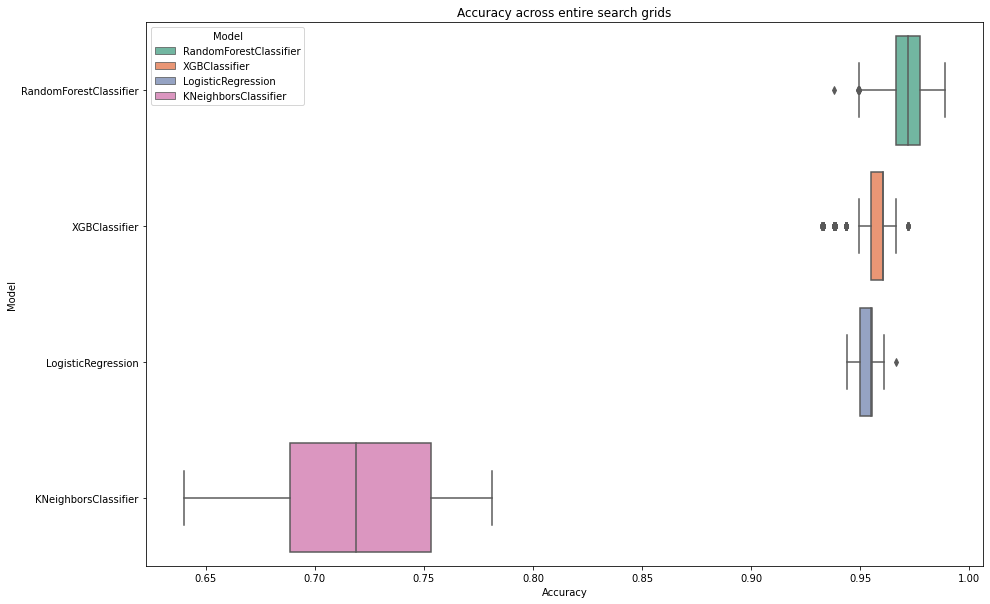

In [353]:

plt.figure(figsize=(15,10))
sns.boxplot(x="Accuracy", y="Model", hue="Model",data=mean_accuracy, palette="Set2", dodge=False).set(title='Accuracy across entire search grids')
plt.savefig("high_level_summary_plot.jpg") 

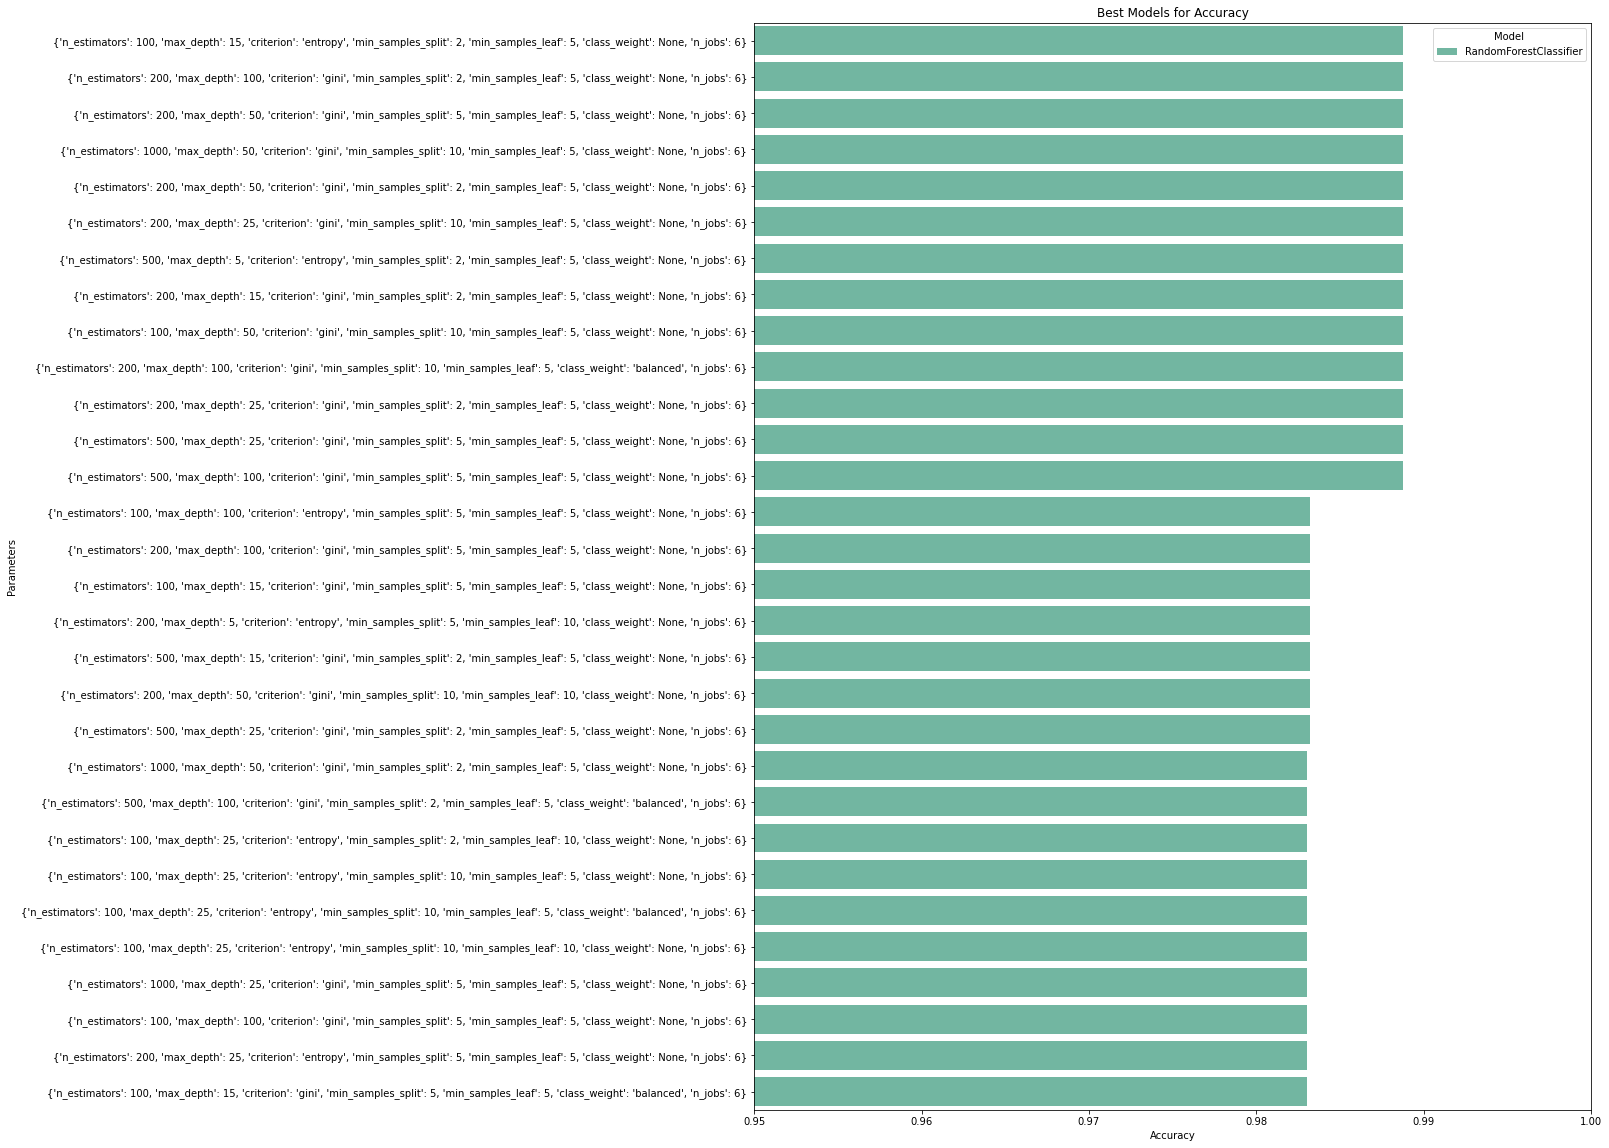

In [349]:
plt.figure(figsize=(15,20))
sns.barplot(x="Accuracy", y="Parameters", hue="Model",data=mean_accuracy.head(30), palette="Set2", dodge=False).set(title='Best Models for Accuracy')
plt.xlim(0.95,1)
plt.savefig("best_accuracy.jpg") 


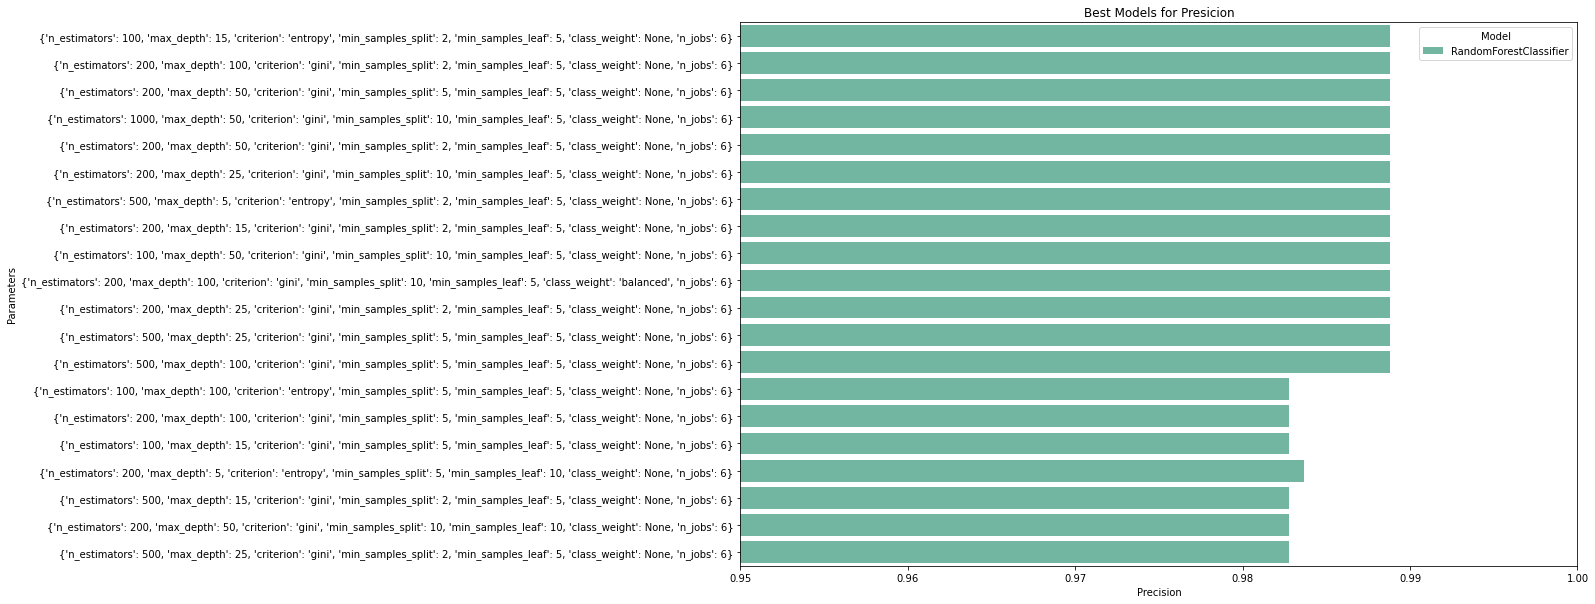

In [350]:
plt.figure(figsize=(15,10))
sns.barplot(x="Precision", y="Parameters", hue="Model",data=mean_accuracy.head(20), palette="Set2", dodge=False).set(title='Best Models for Presicion')
plt.xlim(0.95,1)
plt.savefig("best_precision.jpg") 


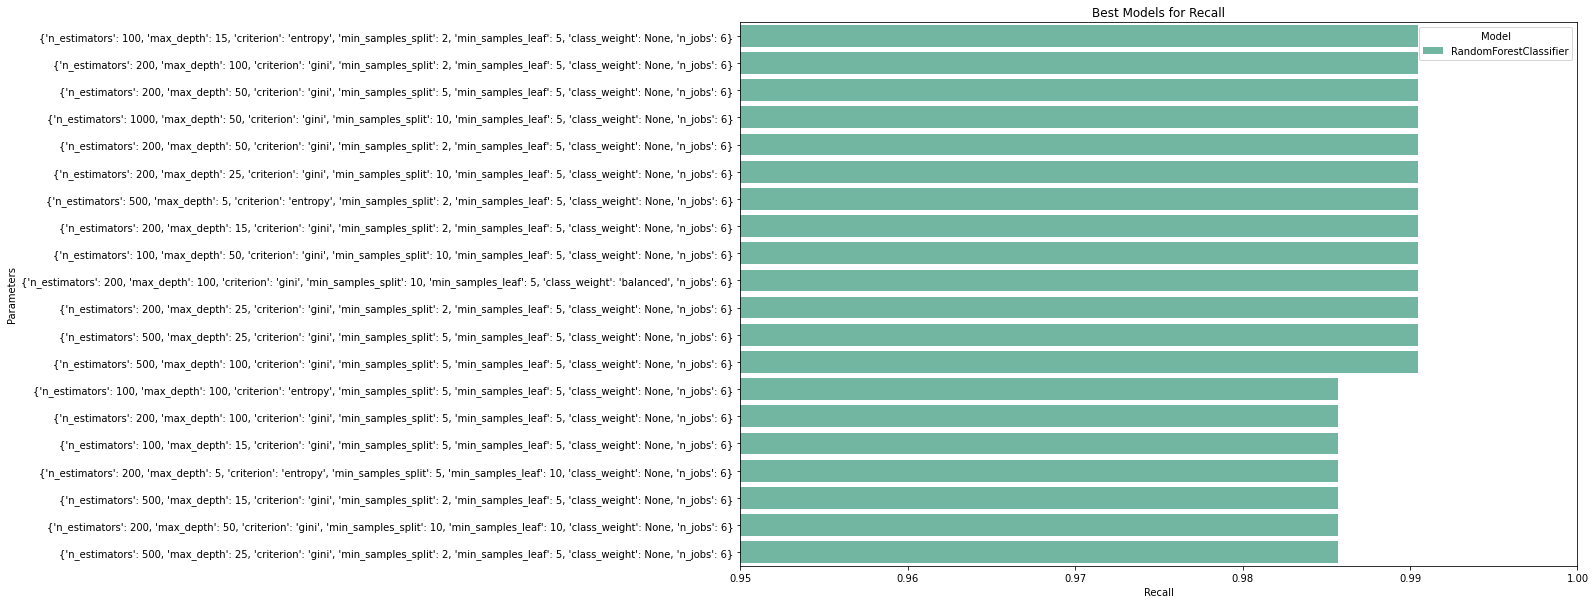

In [351]:
plt.figure(figsize=(15,10))
sns.barplot(x="Recall", y="Parameters", hue="Model",data=mean_accuracy.head(20), palette="Set2", dodge=False).set(title='Best Models for Recall')
plt.xlim(0.95,1)
plt.savefig("best_recall.jpg") 


Note that XGBClassifier parameters for early stopping rounds and criteria are passed through the model.fit call, not the model parameters so they are not getting accounted for in the grid search. If passed to the model.fit line it could cause errors on other model types. This may need more custom coding with if statements for further imporovement.

Compare to the existing sklearn grid search tool

In [354]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import time

xgb_clf = XGBClassifier(use_label_encoder=False, verbosity=0)

cv_object = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

features = wine['data']
target = wine['target']

params = {
      'n_estimators':[500,1000],
      'max_depth':[5,15,20],
      'max_leaves': [30,50,70],
      'min_child_weight': [5, 10, 15],
      'gamma': [1, 1.5, 2, 2.5],
      'subsample': [0.6, 0.8, 1.0],
      'learning_rate': [0.1, 0.05],
      'use_label_encoder':[False]
        }

gs_clf = GridSearchCV(xgb_clf, param_grid=params, scoring='accuracy', n_jobs=6, cv=cv_object, verbose=3)
print("Grid search..")
search_time_start = time.time()
gs_clf.fit(features, target)
print("Grid search time:", time.time() - search_time_start)


Grid search..
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning

[CV 1/5] END gamma=1, learning_rate=0.1, max_depth=5, max_leaves=30, min_child_weight=5, n_estimators=500, subsample=0.6, use_label_encoder=False;, score=0.972 total time=   3.0s
[CV 4/5] END gamma=1, learning_rate=0.1, max_depth=5, max_leaves=30, min_child_weight=5, n_estimators=500, subsample=0.6, use_label_encoder=False;, score=0.914 total time=   3.0s
[CV 3/5] END gamma=1, learning_rate=0.1, max_depth=5, max_leaves=30, min_child_weight=5, n_estimators=500, subsample=0.6, use_label_encoder=False;, score=0.972 total time=   3.0s
[CV 2/5] END gamma=1, learning_rate=0.1, max_depth=5, max_leaves=30, min_child_weight=5, n_estimators=500, subsample=0.6, use_label_encoder=False;, score=1.000 total time=   3.1s
[CV 5/5] END gamma=1, learning_rate=0.1, max_depth=5, max_leaves=30, min_child_weight=5, n_estimators=500, subsample=0.6, use_label_encoder=False;, score=1.000 total time=   3.1s
[CV 1/5] END gamma=1, learning_rate=0.1, max_depth=5, max_leaves=30, min_child_weight=5, n_estimators=500

In [355]:
print("Grid search time:", time.time() - search_time_start)
best_score = gs_clf.best_score_
best_params = gs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Grid search time: 5312.041594982147
Best score: 0.971904761904762
Best params: 
gamma: 1
learning_rate: 0.1
max_depth: 5
max_leaves: 30
min_child_weight: 10
n_estimators: 500
subsample: 0.8
use_label_encoder: False


In [356]:
gs_clf.cv_results_

{'mean_fit_time': array([3.04124417, 3.08177576, 3.74137945, ..., 5.44200115, 5.39710574,
        4.54174981]),
 'std_fit_time': array([0.0574869 , 0.09924954, 0.36078035, ..., 0.36699544, 0.17776295,
        1.18426621]),
 'mean_score_time': array([0.00163112, 0.00130062, 0.00139918, ..., 0.00122838, 0.00130315,
        0.00119786]),
 'std_score_time': array([0.00057369, 0.00018707, 0.00041821, ..., 0.00011405, 0.00012865,
        0.00032681]),
 'param_gamma': masked_array(data=[1, 1, 1, ..., 2.5, 2.5, 2.5],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, ..., 0.05, 0.05, 0.05],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5, 5, 5, ..., 20, 20, 20],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
     

Re-run custom grid search function with just XGB space to compare time to the sklearn GridSearchCV

In [357]:
features = wine['data']
target = wine['target']
n_folds = 5

data = (features, target, n_folds)

xgb_search_space = {
  ('XGBClassifier','xgboost'):{
      'n_estimators':[500,1000],
      'max_depth':[5,15,20],
      'max_leaves': [30,50,70],
      'min_child_weight': [5, 10, 15],
      'gamma': [1, 1.5, 2, 2.5],
      'subsample': [0.6, 0.8, 1.0],
      'learning_rate': [0.1, 0.05],
      'use_label_encoder':[False],
      'n_jobs':[6],
      'verbosity':[0]
      }
}

search_time_start = time.time()
xgb_only_summary = run(data, xgb_search_space)
print("Grid search time:", time.time() - search_time_start)


Grid search time: 1922.086853981018


In [358]:
xgb_only_summary.shape

(6480, 6)

In [359]:
mean_metrics_xbg = xgb_only_summary.groupby(['Model', 'Parameters']).mean().reset_index()
mean_metrics_xbg = mean_metrics_xbg.sort_values(by='Accuracy', ascending=False)
mean_metrics_xbg.head(10)

,Model,Parameters,Fold,Accuracy,Precision,Recall
363,XGBClassifier,"{'n_estimators': 1000, 'max_depth': 20, 'max_leaves': 70, 'min_child_weight'...",2.0,0.971905,0.970528,0.975397
1083,XGBClassifier,"{'n_estimators': 500, 'max_depth': 5, 'max_leaves': 30, 'min_child_weight': ...",2.0,0.971905,0.970528,0.975397
723,XGBClassifier,"{'n_estimators': 500, 'max_depth': 15, 'max_leaves': 50, 'min_child_weight':...",2.0,0.971905,0.970528,0.975397
507,XGBClassifier,"{'n_estimators': 1000, 'max_depth': 5, 'max_leaves': 50, 'min_child_weight':...",2.0,0.971905,0.970528,0.975397
579,XGBClassifier,"{'n_estimators': 1000, 'max_depth': 5, 'max_leaves': 70, 'min_child_weight':...",2.0,0.971905,0.970528,0.975397
867,XGBClassifier,"{'n_estimators': 500, 'max_depth': 20, 'max_leaves': 30, 'min_child_weight':...",2.0,0.971905,0.970528,0.975397
1227,XGBClassifier,"{'n_estimators': 500, 'max_depth': 5, 'max_leaves': 70, 'min_child_weight': ...",2.0,0.971905,0.970528,0.975397
1155,XGBClassifier,"{'n_estimators': 500, 'max_depth': 5, 'max_leaves': 50, 'min_child_weight': ...",2.0,0.971905,0.970528,0.975397
75,XGBClassifier,"{'n_estimators': 1000, 'max_depth': 15, 'max_leaves': 50, 'min_child_weight'...",2.0,0.971905,0.970528,0.975397
795,XGBClassifier,"{'n_estimators': 500, 'max_depth': 15, 'max_leaves': 70, 'min_child_weight':...",2.0,0.971905,0.970528,0.975397


In [360]:
print(mean_metrics_xbg.Accuracy[1202])
print(mean_metrics_xbg.Parameters[1202])

0.966031746031746
{'n_estimators': 500, 'max_depth': 5, 'max_leaves': 50, 'min_child_weight': 5, 'gamma': 1, 'subsample': 0.8, 'learning_rate': 0.05, 'use_label_encoder': False, 'n_jobs': 6, 'verbosity': 0}


In [361]:
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

gamma: 1
learning_rate: 0.1
max_depth: 5
max_leaves: 30
min_child_weight: 10
n_estimators: 500
subsample: 0.8
use_label_encoder: False


## Summary and Conclusions:

### * This custom function allows multiple model types to be run in a single grid search whereas the sklearn gridsearchCV does not
### * This custom function runs faster than the sklearn version. For example running just the xgboost model across the same search space, the sklearn tool takes 88 minutes and the custom function only takes 32 minutes
### * This custom search function returned model/parameter combinations with higher accuracy than the grid search, why don't they match? Both seem to have same cross validation setup and seed, maybe it has to do with early stopping
### * This custom function could be improved with conditional statements for some model types to allow for early stopping parameters in the fit function rather than just hyperparameters in the model creation
### * With so many hyperparameters and differences between models it's tough to autogenerate plots of one parameter vs another for interactions. The output could be improved with summary funtions customized to each model type.
### * Grid search results table is exported to csv and plots were saved per the assignment requests